In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder

# EDA

## Считывание данных

In [65]:
train_df = pd.read_csv('data/train.csv').drop(columns=['Unnamed: 0'])
X_test = pd.read_csv('data/test.csv').drop(columns=['Unnamed: 0'])
train_df

,Grade,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,GBM,TCGA-06-A6S0,Male,79 years 183 days,Glioblastoma,black or african american,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-HT-8106,Male,53 years 197 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
2,LGG,TCGA-HT-7607,Female,61 years 305 days,"Astrocytoma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-QH-A6X5,Female,58 years 55 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
4,LGG,TCGA-P5-A5F1,Male,30 years 113 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,GBM,TCGA-06-0744,Male,67 years,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
599,LGG,TCGA-DU-A6S7,Female,27 years 309 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
600,LGG,TCGA-DU-5853,Male,29 years 32 days,Mixed glioma,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
601,LGG,TCGA-DU-A76R,Male,51 years 312 days,"Oligodendroglioma, anaplastic",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [66]:
X_test

,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,TCGA-DU-A5TW,Female,33 years 54 days,"Astrocytoma, anaplastic",black or african american,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,TCGA-DU-7007,Male,33 years 192 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,TCGA-P5-A5EZ,Male,39 years 131 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,TCGA-02-0055,Female,62 years 153 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,TCGA-28-5218,Male,63 years 86 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
255,TCGA-E1-A7YY,Female,27 years 6 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
256,TCGA-HW-8320,Male,36 years 354 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
257,TCGA-14-0740,Male,70 years 60 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED


## Кодирование целевой переменной

In [67]:
y_train = train_df['Grade'].apply(lambda x: 1 if x=='GBM' else 0)
X_train = train_df.drop(columns=['Grade'])

## Удаление ненужных колонок

In [68]:
X_train = X_train.drop(columns=['Case_ID'])

X_test = X_test.drop(columns=['Case_ID'])

## Конвертирование возраста (годы, дни) в число типа float

In [69]:
def age_to_float(age: str):
    nums = re.findall(r'\d+', age)
    if len(nums) == 2:
        nums[1] = float(nums[1])/365
        return float(nums[0]) + nums[1]
    elif len(nums) == 1:
        return float(nums[0])
    return None

In [70]:
X_train['Age_at_diagnosis'] = X_train['Age_at_diagnosis'].apply(age_to_float)
X_train['Age_at_diagnosis'] = X_train['Age_at_diagnosis'].fillna(X_train['Age_at_diagnosis'].mean())

X_test['Age_at_diagnosis'] = X_test['Age_at_diagnosis'].apply(age_to_float)
X_test['Age_at_diagnosis'] = X_test['Age_at_diagnosis'].fillna(X_test['Age_at_diagnosis'].mean())

## One-hot кодирование даигнозов

In [71]:
# X_train['Primary_Diagnosis'] = X_train['Primary_Diagnosis'].apply(lambda x: [diag.strip() for diag in x.split(',')])
# mlb = MultiLabelBinarizer()
# diagnosis_encoded = pd.DataFrame(mlb.fit_transform(X_train['Primary_Diagnosis']), columns=mlb.classes_)
# diagnosis_encoded = diagnosis_encoded.drop(columns=['--'])
# X_train = X_train.drop(columns=['Primary_Diagnosis'])

# X_test['Primary_Diagnosis'] = X_test['Primary_Diagnosis'].apply(lambda x: [diag.strip() for diag in x.split(',')])
# diagnosis_encoded_test = pd.DataFrame(mlb.transform(X_test['Primary_Diagnosis']), columns=mlb.classes_)
# diagnosis_encoded_test = diagnosis_encoded_test.drop(columns=['--'])
# X_test = X_test.drop(columns=['Primary_Diagnosis'])

X_train = X_train.drop(columns=['Primary_Diagnosis'])
X_test = X_test.drop(columns=['Primary_Diagnosis'])

## One-hot кодирование расы

In [72]:
races_encoded = pd.get_dummies(X_train['Race']).drop(columns=['not reported', '--', 'american indian or alaska native'])
X_train = X_train.drop(columns=['Race'])

races_encoded_test = pd.get_dummies(X_test['Race']).drop(columns=['not reported', '--'])
X_test = X_test.drop(columns=['Race'])

## One-hot кодирование пола

In [73]:
gender_encoded = pd.get_dummies(X_train['Gender']).drop(columns=['--'])
X_train = X_train.drop(columns=['Gender'])

gender_encoded_test = pd.get_dummies(X_test['Gender']).drop(columns=['--'])
X_test = X_test.drop(columns=['Gender'])

## One-hot кодирование всех колонок с информацией о мутации генов

In [74]:
genes_df = X_train.drop(columns=['Age_at_diagnosis'])
le = LabelEncoder()
le.fit(genes_df['IDH1'])
for col in genes_df.columns:
    genes_df[col] = le.transform(genes_df[col])
    

genes_df_test = X_test.drop(columns=['Age_at_diagnosis'])
for col in genes_df_test.columns:
    genes_df_test[col] = le.transform(genes_df_test[col])

In [75]:
X_train = pd.concat([X_train[['Age_at_diagnosis']], races_encoded,
                     gender_encoded, genes_df], axis=1)

X_test = pd.concat([X_test[['Age_at_diagnosis']], races_encoded_test,
                     gender_encoded_test, genes_df_test], axis=1)

## Применяю StandardScaler к колонке с возрастом

In [76]:
scaler = StandardScaler()
scaler.fit(X_train[['Age_at_diagnosis']])
X_train[['Age_at_diagnosis']] = scaler.transform(X_train[['Age_at_diagnosis']])
X_test[['Age_at_diagnosis']] = scaler.transform(X_test[['Age_at_diagnosis']])

## Итоговая таблица

In [77]:
X_train

,Age_at_diagnosis,asian,black or african american,white,Female,Male,IDH1,TP53,ATRX,PTEN,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1.797502,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0.137858,0,0,1,0,1,0,0,1,1,...,1,1,1,1,1,1,1,1,0,1
2,0.668187,0,0,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0.432622,0,0,1,1,0,0,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,-1.347170,0,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.998330,0,0,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
599,-1.504622,0,0,1,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
600,-1.425283,0,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
601,0.030146,0,0,1,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='Age_at_diagnosis'>

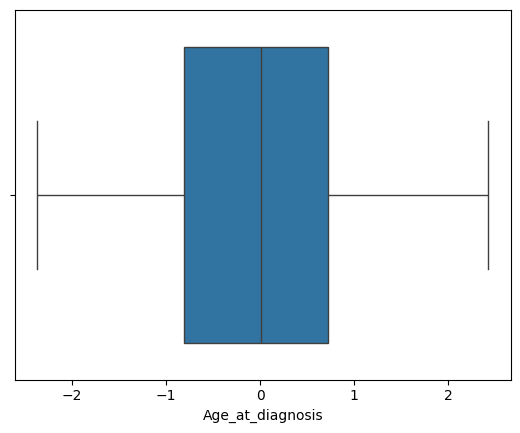

In [78]:
sns.boxplot(X_train, x='Age_at_diagnosis')

В целом матрица корреляций довольно разреженная, однако можно увидеть взаимосвязи между мутациями конкретных генов, а так же зависимость между возрастом и некоторыми диагнозами (например Glioblastoma) а также мутациями некоторых генов.
Также видно, что диагноз Glioblastoma имеет корреляцию с целевой переменной Grade почти равную 1, поэтому удалим этот признак.

<Axes: >

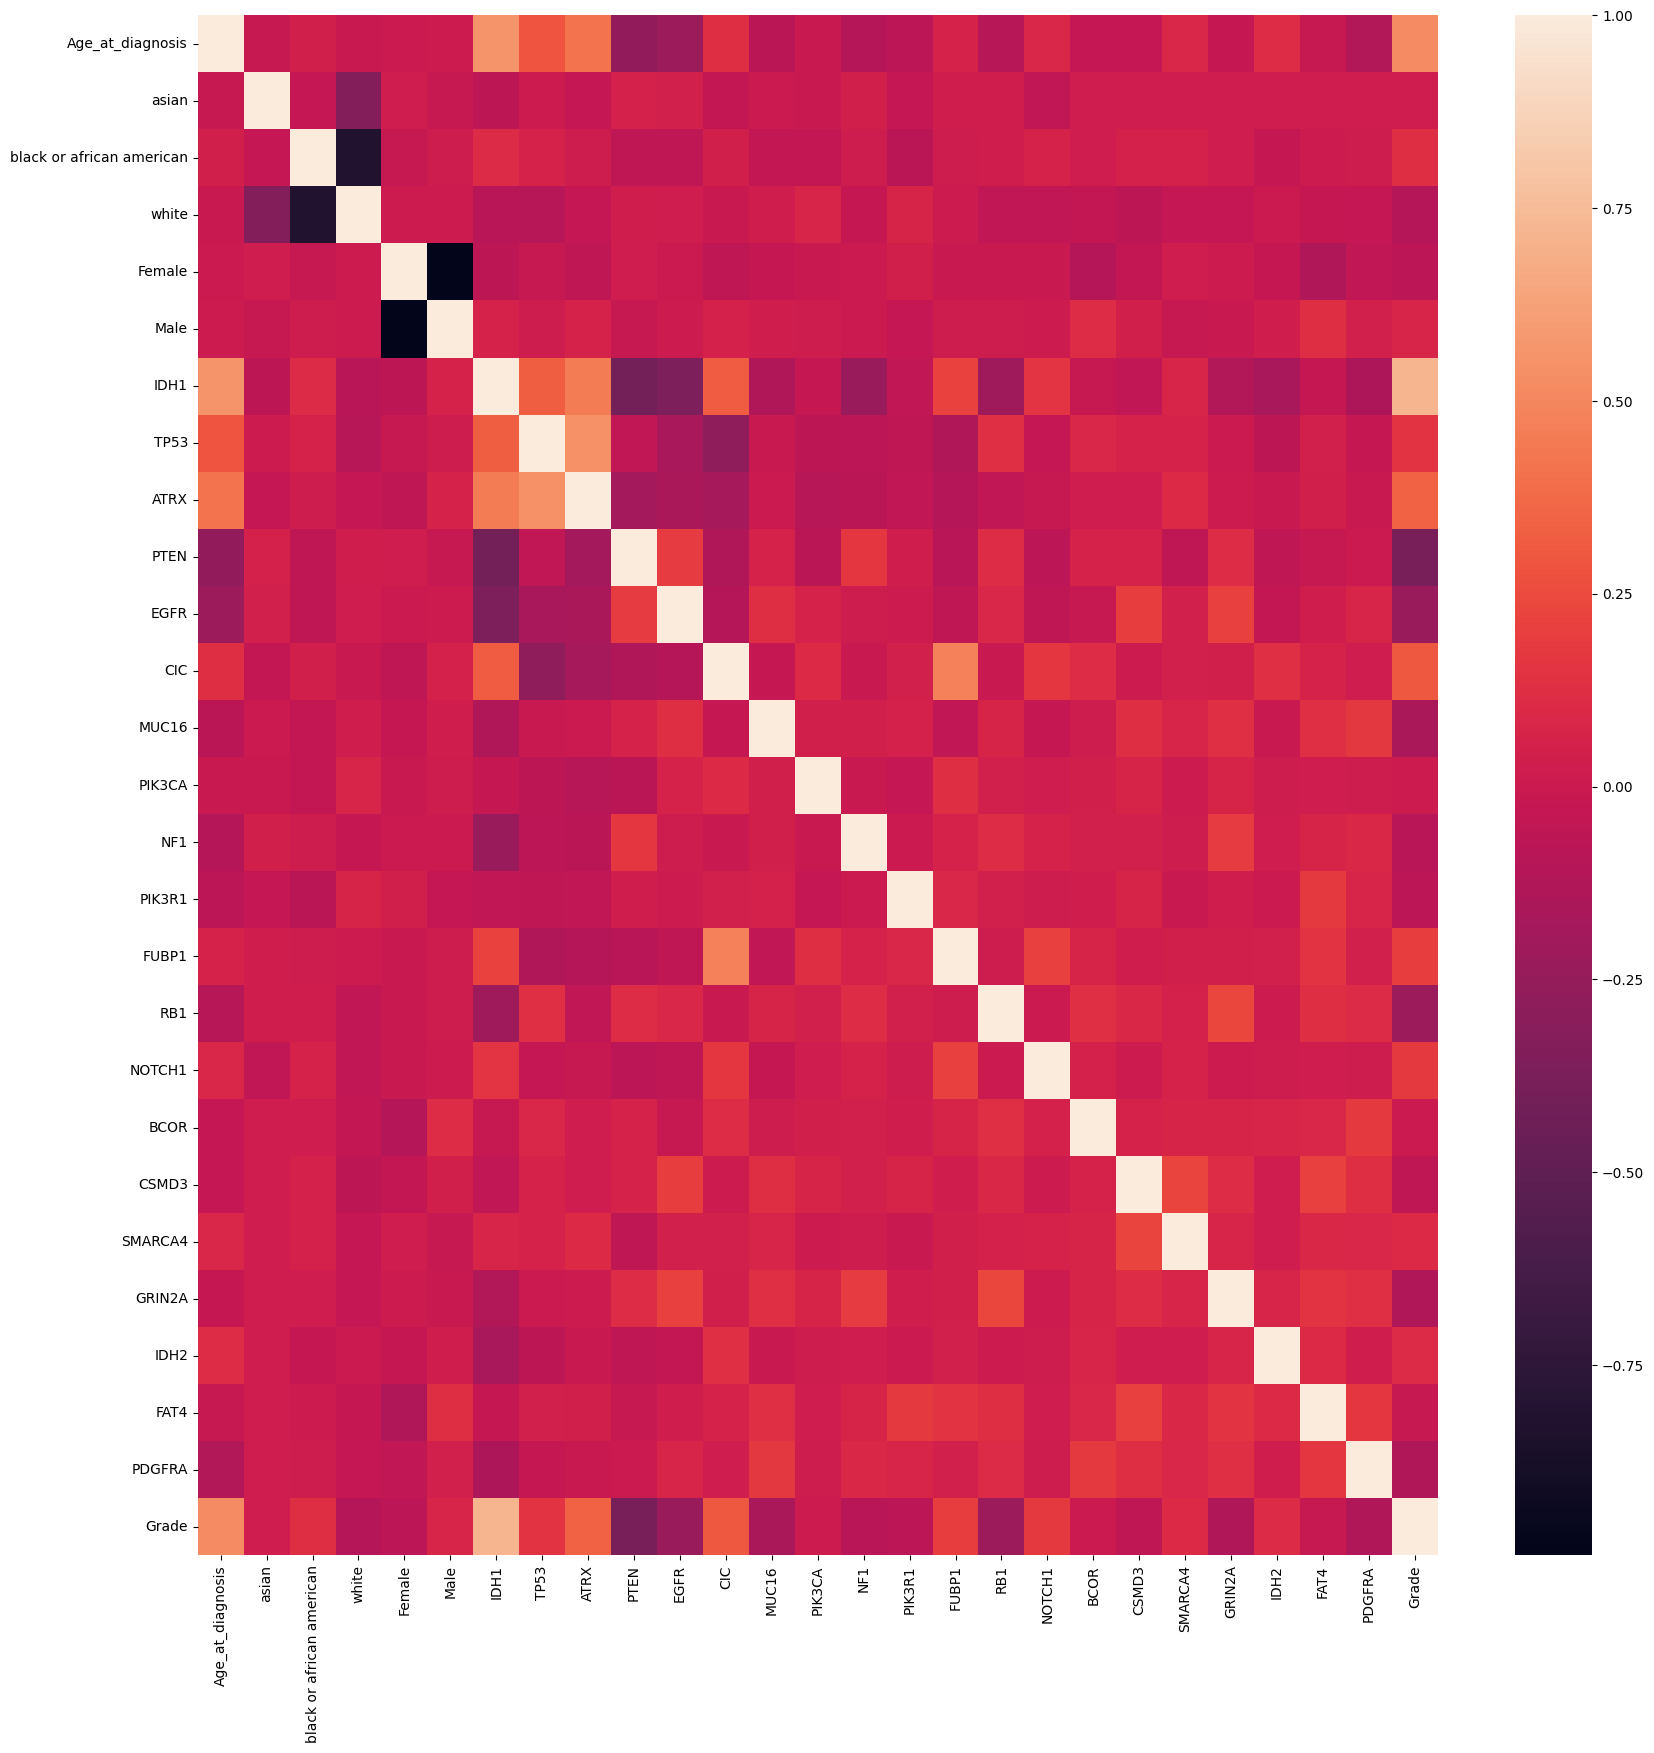

In [79]:
train_df = pd.concat([X_train, pd.Series(y_train, name='Grade')], axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr())

# Простые модели

- рассмотреть работу простых моделей на тренировочных данных 
- посмотреть на какие признаки больше всего "смотрят" модели
- как ведёт модель себя на валидации(провести кросс-валидацию, построить валидационные кривые)
- Найти оптимальные гиперпараметры

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV

## Логистическая регрессия

Для начала рассмотрим логистическую регрессию. Обучим её на дефолтных значениях и посмотрим на веса модели, чтобы оценить отношение к признакам

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression()

Можно увидеть, что модель больше всего обращает внимание на признак IDH1, а дальше на IDH2 и NOTCH1 

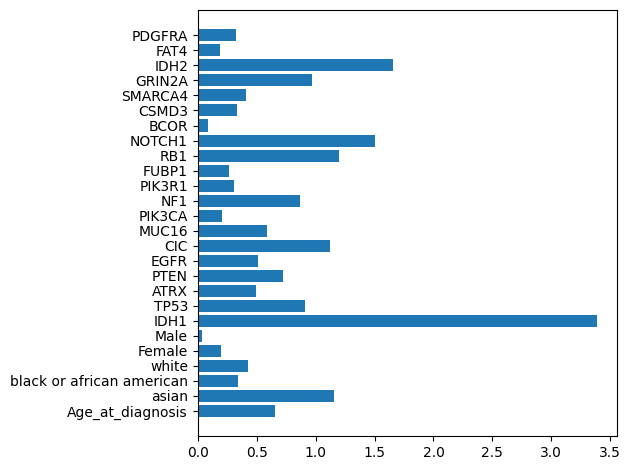

In [82]:
plt.barh(np.arange(log_reg.coef_[0].shape[0]), np.abs(log_reg.coef_[0]))
plt.yticks(np.arange(log_reg.coef_[0].shape[0]), X_train.columns)
plt.tight_layout()
plt.show()

In [83]:
cross_val_res = cross_val_score(log_reg, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8631 +/- 0.0220


Теперь рассмотрим, как ведёт себя лог. регресссия относительно силы регуляризации с помощью разных cпособов регуляризации(соответсвенно разные solver)

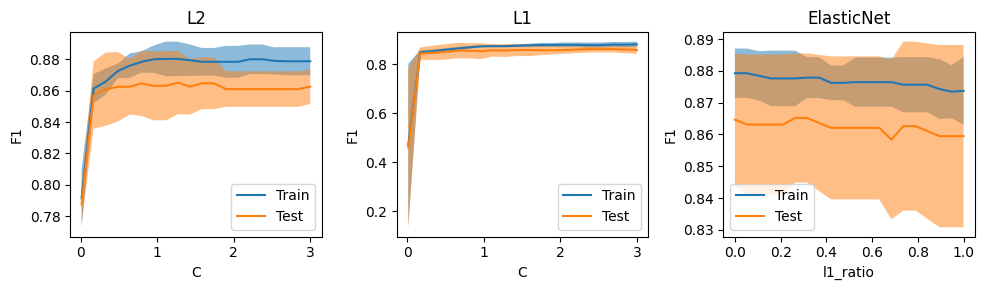

In [84]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="l2"),
                                                X_train, y_train, param_name="C", param_range=np.linspace(0.01, 3, 20), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="l1", solver="liblinear"),
                                                X_train, y_train, param_name="C", param_range=np.linspace(0.01, 3, 20), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(LogisticRegression(penalty="elasticnet", solver="saga"),
                                                X_train, y_train, param_name="l1_ratio", param_range=np.linspace(0.0, 1.0, 20), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("L2")
ax[1].set_title("L1")
ax[2].set_title("ElasticNet")
plt.tight_layout()
plt.show()

Теперь найдём оптимальные параметры. 

In [85]:
param_grid = [
    {"penalty": ["l2"], "solver": ["lbfgs", "liblinear", "newton-cg", "sag", "saga"], "C": np.linspace(0.001, 3, 80)},
    {"penalty": ["l1"], "solver": ["liblinear", "saga"], "C": np.linspace(0.001, 3, 80)},
    {"penalty": ["elasticnet"], "solver": ["saga"], "l1_ratio": np.linspace(0.0, 1.0, 100)}
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_log_reg = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_log_reg.fit(X_train, y_train)

Fitting 3 folds for each of 660 candidates, totalling 1980 fits


/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/igkh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

In [86]:
grid_log_reg.best_params_

{'C': 1.2917088607594935, 'penalty': 'l2', 'solver': 'newton-cg'}

In [87]:
cross_val_res = cross_val_score(LogisticRegression(**grid_log_reg.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8668 +/- 0.0194


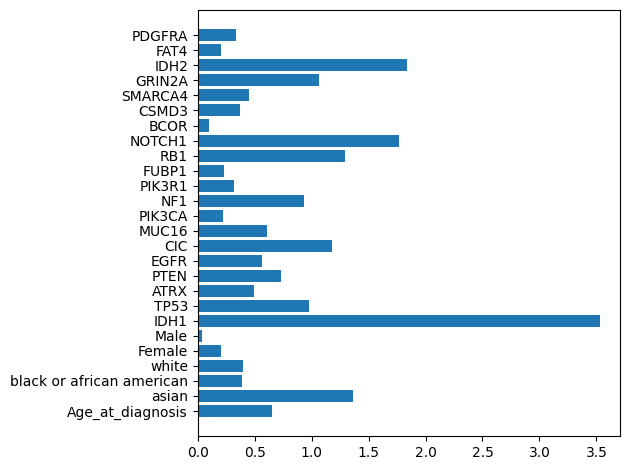

In [88]:
log_reg = LogisticRegression(**grid_log_reg.best_params_)
log_reg.fit(X_train, y_train)
plt.barh(np.arange(log_reg.coef_[0].shape[0]), np.abs(log_reg.coef_[0]))
plt.yticks(np.arange(log_reg.coef_[0].shape[0]), X_train.columns)
plt.tight_layout()
plt.show()

## Дерево принятия решений

Теперь обучим дерево принятия решений

In [89]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree

DecisionTreeClassifier()

Визуализируем его и попробуем оценить признаки на которые смотрит модель

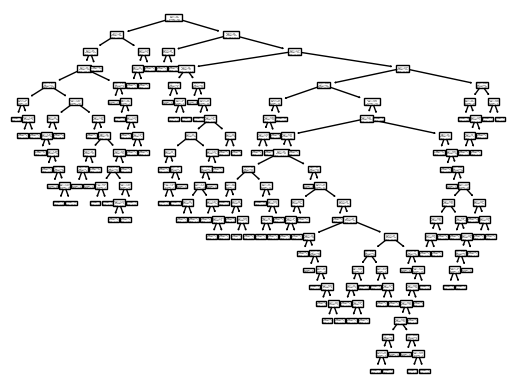

In [90]:
from supertree import SuperTree
plot_tree(decision_tree=dec_tree)
# super_tree = SuperTree(dec_tree, X_train.to_numpy(), y_train.to_numpy(), list(X_train.columns), ["LGG", "GBM"])
# super_tree.show_tree()
plt.show()

In [91]:
cross_val_res = cross_val_score(dec_tree, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.7455 +/- 0.0394


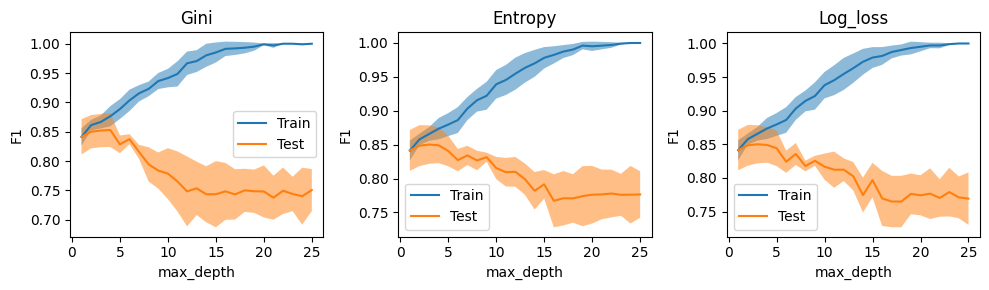

In [92]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="gini"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="entropy"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(criterion="log_loss"),
                                                X_train, y_train, param_name="max_depth", param_range=range(1, len(X_train.columns)), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("Gini")
ax[1].set_title("Entropy")
ax[2].set_title("Log_loss")
plt.tight_layout()
plt.show()

In [93]:
param_grid = [
    {"criterion": ["gini", "entropy", "log_loss"], "max_depth": range(1, len(X_train.columns))},
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_dec_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_dec_tree.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


In [94]:
grid_dec_tree.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [95]:
cross_val_res = cross_val_score(DecisionTreeClassifier(**grid_dec_tree.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8521 +/- 0.0283


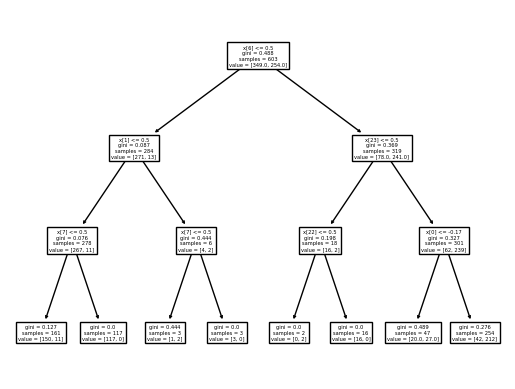

In [96]:
from supertree import SuperTree
dec_tree = DecisionTreeClassifier(**grid_dec_tree.best_params_)
dec_tree.fit(X_train, y_train)
plot_tree(decision_tree=dec_tree)
# super_tree = SuperTree(dec_tree, X_train.to_numpy(), y_train.to_numpy(), list(X_train.columns), ["LGG", "GBM"])
# super_tree.show_tree()
plt.show()

## KNN

Следующий алгоритм, который мы рассмотрим, будет KNN

In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

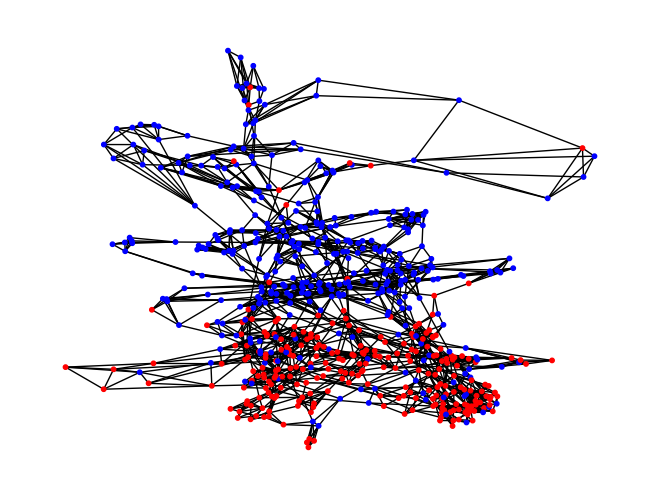

In [98]:
import networkx as nx 
kneighbors_graph = nx.from_scipy_sparse_array(knn.kneighbors_graph(X_train, mode="distance"))
kneighbors_graph.remove_edges_from(nx.selfloop_edges(kneighbors_graph))
color_map = ["blue" if i == 0 else "red" for i in y_train]
nx.draw(kneighbors_graph, node_size=10, node_color=color_map)
plt.draw()

In [99]:
cross_val_res = cross_val_score(knn, X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8214 +/- 0.0201


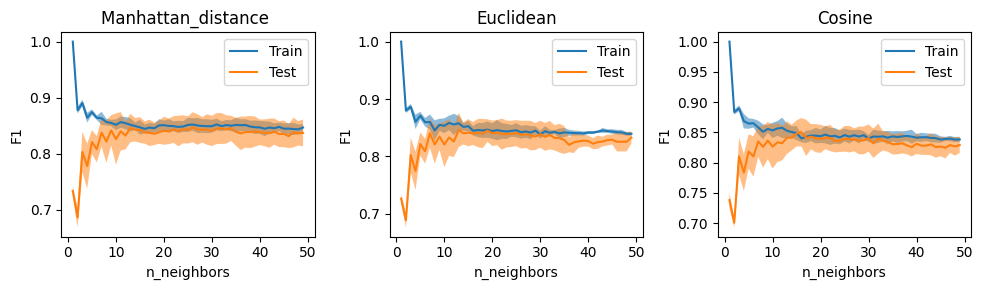

In [100]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(p=1),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[0]
                                                )
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(p=2),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[1]
                                                )
    ValidationCurveDisplay.from_estimator(KNeighborsClassifier(metric="cosine"),
                                                X_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=3,
                                                scoring="f1", ax=ax[2]
                                                )
ax[0].set_title("Manhattan_distance ")
ax[1].set_title("Euclidean")
ax[2].set_title("Cosine")
plt.tight_layout()
plt.show()

In [101]:
param_grid = [
    {"p": ["1"], "n_neighbors": range(1, 50)},
    {"p": ["2"], "n_neighbors": range(1, 50)},
    {"metric": ["cosine"], "n_neighbors": range(1, 50)}
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring="f1", n_jobs=3, verbose=1, cv=3)
    grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 147 candidates, totalling 441 fits


In [102]:
grid_knn.best_params_

{'metric': 'cosine', 'n_neighbors': 16}

In [103]:
cross_val_res = cross_val_score(KNeighborsClassifier(**grid_knn.best_params_), X_train, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8502 +/- 0.0235


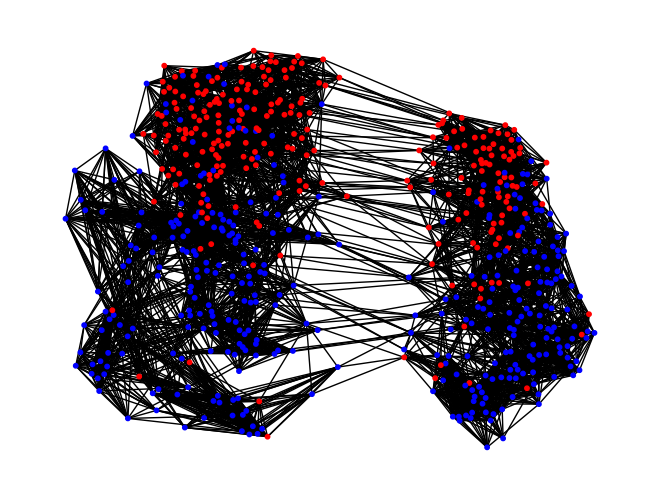

In [104]:
import networkx as nx 
knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(X_train, y_train)
kneighbors_graph = nx.from_scipy_sparse_array(knn.kneighbors_graph(X_train, mode="distance"))
kneighbors_graph.remove_edges_from(nx.selfloop_edges(kneighbors_graph))
color_map = ["blue" if i == 0 else "red" for i in y_train]
nx.draw(kneighbors_graph, node_size=10, node_color=color_map)
plt.draw()

Model based feature selectors

In [105]:
def LinReg_stat_heuristic_select_features_with_bootswrap(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    model: LogisticRegression = LogisticRegression(
        C=0.5, penalty="l1", solver="saga", max_iter=1000, verbose=False
    ),
    num_trials: int = 1000,
    sample_size_ratio: float = 0.25,
    heuristic_fn=lambda e, s: e / (s**2),
    top_k: int = 10,
):

    coef_vals = []

    for _ in tqdm(range(num_trials)):
        idx = np.random.choice(
            X_train.shape[0], int(X_train.shape[0] * sample_size_ratio)
        )
        X_train_sampled, y_train_sampled = (
            X_train.to_numpy()[idx, ...],
            y_train.to_numpy()[idx, ...],
        )
        log_reg = model.fit(X_train_sampled, y_train_sampled)

        coef_vals.append(log_reg.coef_[0])

    coef_vals_arr = np.vstack(coef_vals)
    feat_scores = np.abs(
        heuristic_fn(np.mean(coef_vals_arr, 0), np.std(coef_vals_arr, 0))
    )

    best_idx = np.argsort(feat_scores)[-top_k:]

    return (
        pd.DataFrame(
            {"feature": X_train.columns[best_idx], "score": feat_scores[best_idx]}
        )
        .sort_values("score", ascending=False)
        .set_index("feature")
    )

In [106]:
def model_based_greedy_select_features_with_patience(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    model: LogisticRegression = LogisticRegression(
        C=0.5, penalty="l1", solver="saga", max_iter=1000, verbose=False
    ),
    patience: int = 0,
    scoring_metric:str = "f1",
    strict: bool = True
):

    selected_feats = []
    patience_counter = 0
    global_best_score = 0
    score_history = []
    X_train_iterative = X_train.copy()

    while ((patience_counter <= patience) and (len(X_train_iterative.columns)>0)):

        current_best_score = 0
        current_best_feature = 0

        for feature in X_train_iterative.columns:

            X_train_cur_feats = X_train[[feature] + selected_feats]

            cross_val_res = np.mean(cross_val_score(model, X_train_cur_feats, y_train, cv=10, scoring=scoring_metric))

            if cross_val_res > current_best_score:
                current_best_score = cross_val_res
                current_best_feature = feature

        if (strict and current_best_score > global_best_score) or ((not strict) and current_best_score >= global_best_score):
            global_best_score = current_best_score
        else:
            patience_counter = patience_counter+1

        if patience_counter <= patience:
            selected_feats.append(current_best_feature)
            score_history.append(current_best_score)
            X_train_iterative = X_train_iterative.drop(columns = [current_best_feature])

    return (
        pd.DataFrame(
            {"feature": selected_feats, "score": score_history}
        )
        .set_index("feature")
    )

In [107]:
selected_feats_es_balance = LinReg_stat_heuristic_select_features_with_bootswrap(
    X_train,
    y_train,
    LogisticRegression(
        **grid_log_reg.best_params_
    ),
    num_trials=20000,
    top_k=5,
)

100%|██████████| 20000/20000 [00:32<00:00, 624.13it/s]


In [108]:
selected_feats_es_balance

,score
feature,
IDH1,19.189774
CIC,15.699843
Age_at_diagnosis,10.497174
FUBP1,8.733317
RB1,5.825896


In [109]:
linreg_selected_feats_greedy = model_based_greedy_select_features_with_patience(
    X_train,
    y_train,
    LogisticRegression(
        **grid_log_reg.best_params_
    ),
    patience=2,
    strict=True
)

In [110]:
linreg_selected_feats_greedy

,score
feature,
IDH1,0.842539
IDH2,0.863222
NOTCH1,0.867861
asian,0.867861
black or african american,0.867861
Age_at_diagnosis,0.869135
NF1,0.872628
GRIN2A,0.877190
ATRX,0.879186


In [111]:
tree_selected_feats_greedy = model_based_greedy_select_features_with_patience(
    X_train,
    y_train,
    DecisionTreeClassifier(
        **grid_dec_tree.best_params_
    ),
    patience=2,
    strict=True
)

In [112]:
tree_selected_feats_greedy

,score
feature,
IDH1,0.842539
IDH2,0.863222
NOTCH1,0.867861
GRIN2A,0.872068
asian,0.872068
black or african american,0.872068


In [113]:
knn_selected_feats_greedy = model_based_greedy_select_features_with_patience(
    X_train,
    y_train,
    KNeighborsClassifier(
        **grid_knn.best_params_
    ),
    patience=2,
    strict=True
)

In [114]:
knn_selected_feats_greedy

,score
feature,
IDH1,0.747788
IDH2,0.863222
PIK3CA,0.865433
FUBP1,0.865433
asian,0.865433
PTEN,0.867420


In [115]:
selected_features = list(set(selected_feats_es_balance.index.to_list() + linreg_selected_feats_greedy.index.to_list() + tree_selected_feats_greedy.index.to_list() + knn_selected_feats_greedy.index.to_list()))

In [116]:
X_train_selected_features = X_train[selected_features]

In [117]:
X_train_selected_features

,NF1,NOTCH1,FUBP1,CIC,IDH2,black or african american,RB1,Female,SMARCA4,Age_at_diagnosis,PIK3CA,PTEN,IDH1,asian,GRIN2A,ATRX
0,1,1,1,1,1,1,1,0,1,1.797502,0,1,1,0,1,1
1,1,1,1,1,1,0,1,0,1,0.137858,1,1,0,0,1,1
2,1,1,1,1,1,0,1,1,1,0.668187,0,1,0,0,1,1
3,1,1,1,0,1,0,1,1,1,0.432622,1,1,0,0,1,1
4,1,1,1,1,1,0,1,0,1,-1.347170,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1,1,1,1,1,0,1,0,1,0.998330,1,1,1,0,1,1
599,1,1,1,1,1,0,1,1,1,-1.504622,1,1,0,0,1,0
600,1,1,1,1,1,0,1,0,1,-1.425283,1,1,0,0,1,0
601,1,1,1,1,1,0,1,0,1,0.030146,0,1,0,0,1,1


<Axes: >

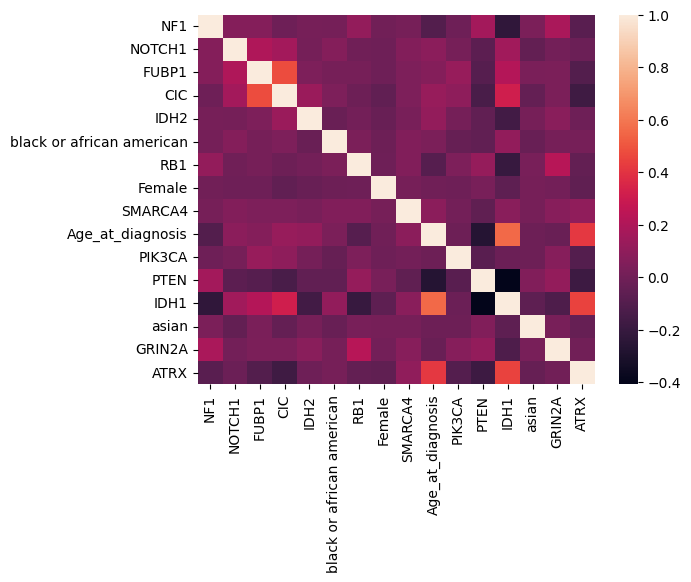

In [118]:
sns.heatmap(X_train_selected_features.corr())

Model cringe ensembling

In [119]:
from sklearn.ensemble import StackingClassifier

In [123]:
estimators = [
        LogisticRegression(
        **grid_log_reg.best_params_
    ),
        DecisionTreeClassifier(
        **grid_dec_tree.best_params_
    ),
        KNeighborsClassifier(
        **grid_knn.best_params_
    )
]

estimator_names = ["lr", "dt", "knn"]

In [135]:
stacked_ensemble = StackingClassifier(
    estimators=list(zip(estimator_names, estimators)), final_estimator=LogisticRegression()
)

In [136]:
cross_val_res = cross_val_score(stacked_ensemble, X_train_selected_features, y_train, cv=3, scoring="f1")
cross_val_mean = np.mean(cross_val_res)
cross_val_std = np.std(cross_val_res)

print(f"F1 ---- {cross_val_mean:.4f} +/- {cross_val_std:.4f}")

F1 ---- 0.8657 +/- 0.0200
